### The task of this notebook is to run a super-simple example of a neural network and then play with the parameters and see how they effect the outcome

## We'll start byloading the data and looking at it:

Load the fastai vision library:

In [10]:
from fastai.vision import *

save a path to the MNIST (written digits) dataset:

In [13]:
mnist_path = untar_data(URLs.MNIST_SAMPLE)
mnist_path

PosixPath('/home/guy/.fastai/data/mnist_sample')

(Posix is a path standard similar to the way we write web site adresses)

Lets create an image list from the images in the path:

In [16]:
image_list = ImageList.from_folder(mnist_path)

lets look at the image list object:

In [15]:
image_list

ImageList (14434 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /home/guy/.fastai/data/mnist_sample

We see it contains 14,434 images, each image has 3 layers (red, green, blue) and 28X28 pixels.

Lets look at some images:

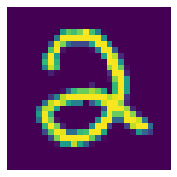

In [36]:
image_list[10].show()

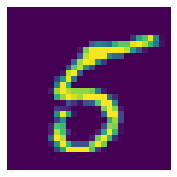

In [37]:
image_list[9998].show()

and look at a specific image path:

In [42]:
image_list.items[9998]

PosixPath('/home/guy/.fastai/data/mnist_png/training/5/33553.png')

as you can see, the image is in a folder named '5', hinting its value

## Using a pre-trained model:

In order to learn from the images, we need to put them in something called a 'Data Bunch'. This is just a way for fastai to orginize the data.

In [20]:
mnist_data = ImageDataBunch.from_folder(path)

Now we create a learner. The learner trains the model.
You load a pretrained model (for a list of pretrained models visit https://docs.fast.ai/vision.models.html#Computer-Vision-models-zoo) ready for fine tuning:

In [21]:
learn = cnn_learner(mnist_data, models.resnet18)

And now you're ready to train!

In [31]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.137497,0.096327,0.971050,00:06


we see our configuration gives us 97 percent accuracy!

In [ ]:
#add confusion matrix
#best examples
#worst examples

In the next notebook we will play with different hyperparameters and learn how this network works.

In [ ]:
#send these into the next notebook:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


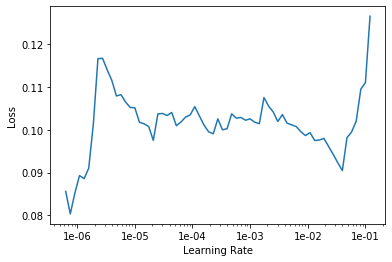

In [62]:
learn.lr_find()
learn.recorder.plot()

In [32]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [55]:
model2 = nn.Sequential(
    conv(3, 8), # 14
    nn.BatchNorm2d(8), #try with/without batch norm
    nn.LeakyReLU(negative_slope=0.2), #try relu/leaky relu
    Flatten()
)

In [56]:
learn2 = Learner(data, model2, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)
learn2.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,6.636019,6.419090,0.381747,00:03


In [46]:
model3 = nn.Sequential(
    conv(3, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
#     Flatten(),     # remove (1,1) grid
    conv(10, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

In [47]:
learn3 = Learner(data, model3, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)
learn3.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.777677,0.604232,0.986752,00:04
